In [1]:
from sparkpdf import *

spark = start()

Spark version: 3.5.3
Spark Pdf version: 0.0.1


24/10/25 08:13:33 WARN Utils: Your hostname, nmelnik-1-0 resolves to a loopback address: 127.0.1.1; using 192.168.0.105 instead (on interface wlo1)
24/10/25 08:13:33 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/10/25 08:13:33 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable



    Image #0:
    Path: unipdf-medical-bill.pdf
    Resolution: 300 dpi
    Width: 2550 px
    Height: 3300 px


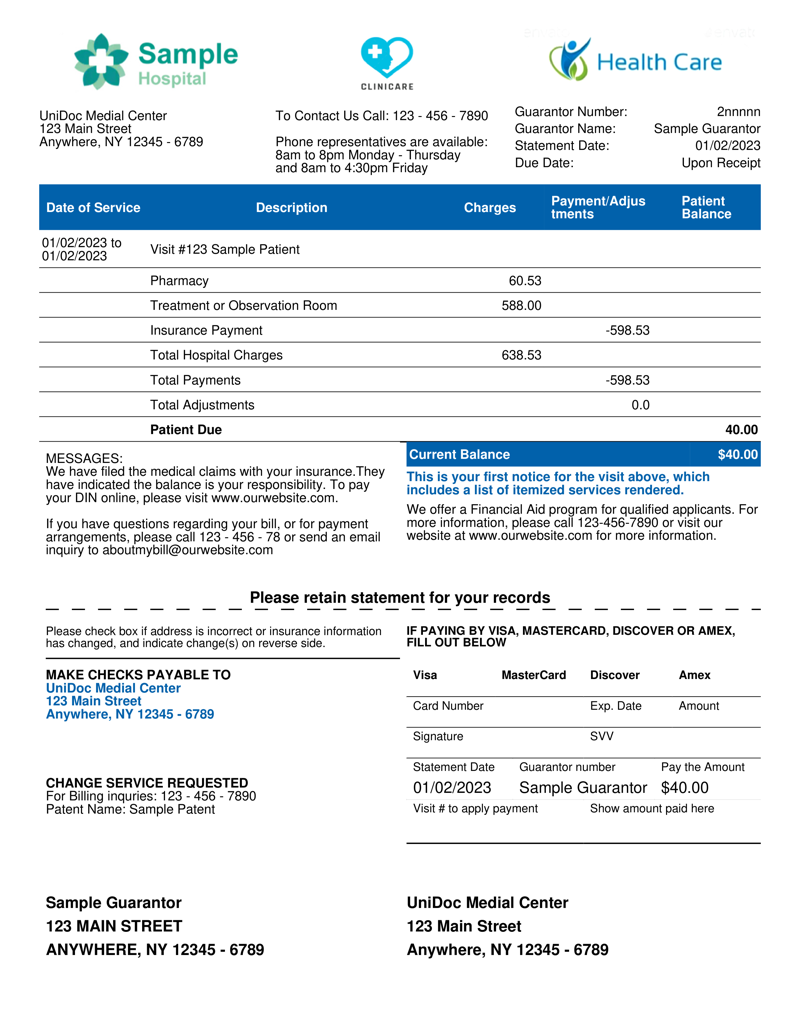


    Image #1:
    Path: unipdf-medical-bill.pdf
    Resolution: 300 dpi
    Width: 2550 px
    Height: 3300 px


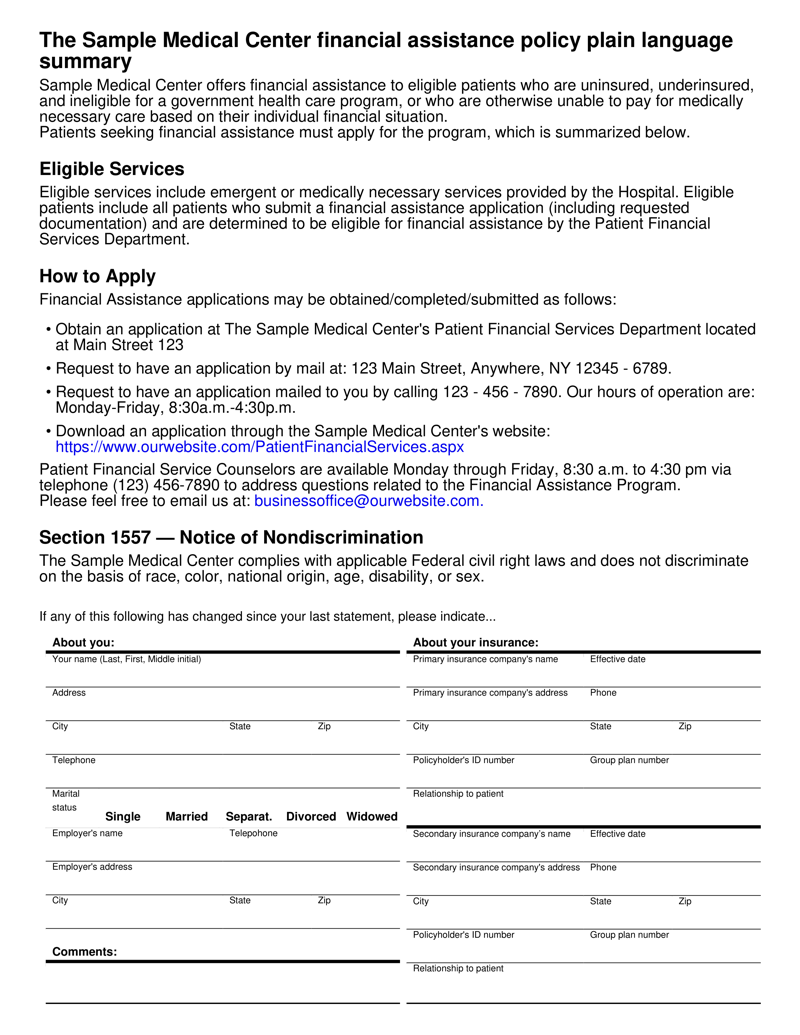

In [2]:
import importlib.resources
from pyspark.ml.pipeline import PipelineModel

#pdf_example = importlib.resources.files('sparkpdf').joinpath('resources/pdfs/unipdf-medical-pbill.pdf').as_posix()
pdf_example = "../../sparkpdf/resources/pdfs/unipdf-medical-bill.pdf"
df = spark.read.format("binaryFile") \
    .load(pdf_example)

df.show_pdf()

In [3]:
pipeline = PipelineModel(stages=[PdfDataToImage(inputCol="content", outputCol="image"),
                                 TesseractOcr(inputCol="image", outputCol="text", psm=11, scoreThreshold=0.5, keepFormatting=True, keepInputData=True),])

result = pipeline.transform(df).cache()

result.show()


+--------------------+--------------------+------+----+--------------------+--------------------+
|                path|    modificationTime|length|page|               image|                text|
+--------------------+--------------------+------+----+--------------------+--------------------+
|file:/home/nmelni...|2024-10-20 14:07:...| 85204|   0|{file:/home/nmeln...|{file:/home/nmeln...|
|file:/home/nmelni...|2024-10-20 14:07:...| 85204|   1|{file:/home/nmeln...|{file:/home/nmeln...|
+--------------------+--------------------+------+----+--------------------+--------------------+


In [8]:
result.select("text.*").show(10, False)

+--------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [6]:
print(result.select("text.text").collect()[0][0])



                                                         D
                      Sample
                                                                                               Health Care


                                                         CLINICARE

                                                                                  Guarantor Number:              2nnnnn
      UniDoc Medial Center                 To Contact Us Call: 123  456  7890
                                                                  -    -
      123 Main Street                                                             Guarantor Name:      Sample Guarantor
      Anywhere, NY 12345 - 6789           Phone representatives are available:    Statement Date:             01/02/2023
                                           8am to 8pm Monday Thursday
                                                               -                  Due Date:                 Upon Receipt
                              